# Sprint24課題 ゲート付きリカレントニューラルネットワーク

## 【問題1】各種手法の実行
Keras公式のサンプルをスタートコードとします。これを元に、上記11個の項目全てを使用してください。

例えばこの中でSimpleRNNとLSTMなどは並列関係であり、精度の比較が行えます。そういった関係を見つけて比較をしてください。

なおConvLSTM2Dのみ2次元配列を受け付ける手法であり、他と単純な精度の比較はできません。

LSTMのサンプルコード<br>
[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)

ConvLSTM2Dのサンプルコード<br>
[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [4]:
#numpyのdown　grade
#CuDNNLSTMなどを使うために必要
!pip uninstall numpy
!pip install numpy==1.16.2

Uninstalling numpy-1.16.4:
  Would remove:
    /usr/bin/f2py
    /usr/bin/f2py3
    /usr/bin/f2py3.6
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.6
    /usr/local/lib/python3.6/dist-packages/numpy-1.16.4.dist-info/*
    /usr/local/lib/python3.6/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.16.4
     |████████████████████████████████| 17.3MB 3.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.

The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.

**Notes**

- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.

- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.

'''

from __future__ import print_function
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import RNN, SimpleRNN, GRU, LSTM, ConvLSTM2D, SimpleRNNCell, GRUCell, LSTMCell, StackedRNNCells, CuDNNGRU, CuDNNLSTM
from keras.datasets import imdb
from keras import backend as K 

def rnn(model_instance):
        max_features = 20000
        # cut texts after this number of words (among top max_features most common words)
        maxlen = 80
        batch_size = 32

        print('Loading data...')
        (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
        print(len(x_train), 'train sequences')
        print(len(x_test), 'test sequences')

        print('Pad sequences (samples x time)')
        x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
        x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
        print('x_train shape:', x_train.shape)
        print('x_test shape:', x_test.shape)

        print('Build model...')
        model = Sequential()
        model.add(Embedding(max_features, 32))
        model.add(model_instance)
        model.add(Dense(1, activation='sigmoid'))

        # try using different optimizers and different optimizer configs
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        print('Train...')
        model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=5,
                  validation_data=(x_test, y_test))
        score, acc = model.evaluate(x_test, y_test,
                                    batch_size=batch_size)
        print('Test score:', score)
        print('Test accuracy:', acc)
        K.clear_session()

In [0]:
#RNN

cells = [SimpleRNNCell(32)]
layer = RNN(cells)
rnn(layer)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 27s 1ms/step - loss: 0.6568 - acc: 0.5981 - val_loss: 0.5228 - val_acc: 0.7427
Epoch 2/5
25000/25000 [==============================] - 27s 1ms/step - loss: 0.4871 - acc: 0.7672 - val_loss: 0.5266 - val_acc: 0.7492
Epoch 3/5
25000/25000 [==============================] - 27s 1ms/step - loss: 0.4106 - acc: 0.8136 - val_loss: 0.5804 - val_acc: 0.6986
Epoch 4/5
25000/25000 [==============================] - 26s 1ms/step - loss: 0.2743 - acc: 0.8899 - val_loss: 0.5198 - val_acc: 0.8071
Epoch 5/5
25000/25000 [==============================] - 5s 190us/step
Test score: 0.5711847128677369
Test accuracy: 0.786


In [0]:
#SimpleRNN
rnn(SimpleRNN(32))

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 28s 1ms/step - loss: 0.6400 - acc: 0.6137 - val_loss: 0.4985 - val_acc: 0.7666
Epoch 2/5
25000/25000 [==============================] - 28s 1ms/step - loss: 0.4538 - acc: 0.7895 - val_loss: 0.5999 - val_acc: 0.6885
Epoch 3/5
25000/25000 [==============================] - 27s 1ms/step - loss: 0.2981 - acc: 0.8774 - val_loss: 0.4823 - val_acc: 0.7953
Epoch 4/5
25000/25000 [==============================] - 27s 1ms/step - loss: 0.1467 - acc: 0.9476 - val_loss: 0.5722 - val_acc: 0.7885
Epoch 5/5
25000/25000 [==============================] - 5s 205us/step
Test score: 0.7069683847951889
Test accuracy: 0.7744


In [0]:
#GRU
rnn(GRU(32))

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 89s 4ms/step - loss: 0.4475 - acc: 0.7822 - val_loss: 0.3661 - val_acc: 0.8384
Epoch 2/5
25000/25000 [==============================] - 89s 4ms/step - loss: 0.2685 - acc: 0.8908 - val_loss: 0.3740 - val_acc: 0.8357
Epoch 3/5
25000/25000 [==============================] - 88s 4ms/step - loss: 0.1918 - acc: 0.9269 - val_loss: 0.4015 - val_acc: 0.8292
Epoch 4/5
25000/25000 [==============================] - 89s 4ms/step - loss: 0.1323 - acc: 0.9534 - val_loss: 0.5474 - val_acc: 0.8049
Epoch 5/5
25000/25000 [==============================] - 16s 626us/step
Test score: 0.6417446013975143
Test accuracy: 0.81756


In [2]:
#LSTM
rnn(LSTM(32))

W0720 09:40:00.631073 140156685113216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)


W0720 09:40:06.697273 140156685113216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 09:40:06.706713 140156685113216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 09:40:06.884383 140156685113216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...


W0720 09:40:06.905904 140156685113216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0720 09:40:06.911321 140156685113216 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train...


W0720 09:40:07.754565 140156685113216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 111s 4ms/step - loss: 0.4335 - acc: 0.7926 - val_loss: 0.3582 - val_acc: 0.8434
Epoch 2/5
25000/25000 [==============================] - 107s 4ms/step - loss: 0.2526 - acc: 0.8981 - val_loss: 0.3838 - val_acc: 0.8367
Epoch 3/5
25000/25000 [==============================] - 107s 4ms/step - loss: 0.1648 - acc: 0.9382 - val_loss: 0.4874 - val_acc: 0.8290
Epoch 4/5
25000/25000 [==============================] - 107s 4ms/step - loss: 0.1081 - acc: 0.9619 - val_loss: 0.5721 - val_acc: 0.8228
Epoch 5/5
25000/25000 [==============================] - 20s 819us/step
Test score: 0.6361201404476166
Test accuracy: 0.81856


In [0]:
#SimpleRNNCell
cells = [SimpleRNNCell(32), SimpleRNNCell(64)]
layer = RNN(cells)
rnn(layer)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 43s 2ms/step - loss: 0.5688 - acc: 0.6748 - val_loss: 0.4257 - val_acc: 0.8154
Epoch 2/5
25000/25000 [==============================] - 48s 2ms/step - loss: 0.3219 - acc: 0.8673 - val_loss: 0.4284 - val_acc: 0.8166
Epoch 3/5
25000/25000 [==============================] - 55s 2ms/step - loss: 0.1537 - acc: 0.9449 - val_loss: 0.5498 - val_acc: 0.8087
Epoch 4/5
25000/25000 [==============================] - 58s 2ms/step - loss: 0.0573 - acc: 0.9811 - val_loss: 0.7428 - val_acc: 0.7626
Epoch 5/5
25000/25000 [==============================] - 9s 367us/step
Test score: 0.8552805742788315
Test accuracy: 0.79304


In [0]:
#GRUCell
cells = [GRUCell(32), GRUCell(64)]
layer = RNN(cells)
rnn(layer)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 146s 6ms/step - loss: 0.4394 - acc: 0.7878 - val_loss: 0.3651 - val_acc: 0.8375
Epoch 2/5
25000/25000 [==============================] - 145s 6ms/step - loss: 0.2689 - acc: 0.8931 - val_loss: 0.3791 - val_acc: 0.8321
Epoch 3/5
25000/25000 [==============================] - 147s 6ms/step - loss: 0.1887 - acc: 0.9296 - val_loss: 0.4442 - val_acc: 0.8232
Epoch 4/5
25000/25000 [==============================] - 147s 6ms/step - loss: 0.1319 - acc: 0.9529 - val_loss: 0.5374 - val_acc: 0.8158
Epoch 5/5
25000/25000 [==============================] - 26s 1ms/step
Test score: 0.6175680731844903
Test accuracy: 0.81412


In [0]:
#LSTMCell
cells = [LSTMCell(32), LSTMCell(64)]
layer = RNN(cells)
rnn(layer)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 219s 9ms/step - loss: 0.4240 - acc: 0.7961 - val_loss: 0.3722 - val_acc: 0.8351
Epoch 2/5
25000/25000 [==============================] - 198s 8ms/step - loss: 0.2489 - acc: 0.9004 - val_loss: 0.3762 - val_acc: 0.8349
Epoch 3/5
25000/25000 [==============================] - 193s 8ms/step - loss: 0.1545 - acc: 0.9422 - val_loss: 0.4594 - val_acc: 0.8264
Epoch 4/5
25000/25000 [==============================] - 193s 8ms/step - loss: 0.0966 - acc: 0.9646 - val_loss: 0.5180 - val_acc: 0.8194
Epoch 5/5
25000/25000 [==============================] - 22s 873us/step
Test score: 0.6519101509046554
Test accuracy: 0.8112


In [0]:
#StackedRNNCells
cells = [LSTMCell(32), LSTMCell(64)]
stacked_cells = StackedRNNCells(cells)
layer = RNN(stacked_cells)
rnn(layer)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 140s 6ms/step - loss: 0.4241 - acc: 0.7960 - val_loss: 0.3728 - val_acc: 0.8349
Epoch 2/5
25000/25000 [==============================] - 175s 7ms/step - loss: 0.2500 - acc: 0.9001 - val_loss: 0.3765 - val_acc: 0.8351
Epoch 3/5
25000/25000 [==============================] - 511s 20ms/step - loss: 0.1571 - acc: 0.9414 - val_loss: 0.4549 - val_acc: 0.8266
Epoch 4/5
25000/25000 [==============================] - 125s 5ms/step - loss: 0.0976 - acc: 0.9640 - val_loss: 0.5212 - val_acc: 0.8192
Epoch 5/5
25000/25000 [==============================] - 20s 785us/step
Test score: 0.6096811695408821
Test accuracy: 0.8094


In [0]:
#CuDNNGRU

rnn(CuDNNGRU(64))

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 8s 322us/step - loss: 0.4497 - acc: 0.7774 - val_loss: 0.3600 - val_acc: 0.8435
Epoch 2/5
25000/25000 [==============================] - 8s 314us/step - loss: 0.2604 - acc: 0.8951 - val_loss: 0.3730 - val_acc: 0.8340
Epoch 3/5
25000/25000 [==============================] - 8s 314us/step - loss: 0.1691 - acc: 0.9373 - val_loss: 0.3893 - val_acc: 0.8386
Epoch 4/5
25000/25000 [==============================] - 8s 312us/step - loss: 0.1015 - acc: 0.9633 - val_loss: 0.5220 - val_acc: 0.8246
Epoch 5/5
25000/25000 [==============================] - 2s 92us/step
Test score: 0.7868273933792114
Test accuracy: 0.81404


In [0]:
#CuDNNLSTM
rnn(CuDNNLSTM(64))

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 8s 326us/step - loss: 0.4373 - acc: 0.7927 - val_loss: 0.3726 - val_acc: 0.8401
Epoch 2/5
25000/25000 [==============================] - 8s 310us/step - loss: 0.2611 - acc: 0.8970 - val_loss: 0.3853 - val_acc: 0.8308
Epoch 3/5
25000/25000 [==============================] - 8s 307us/step - loss: 0.1830 - acc: 0.9318 - val_loss: 0.4727 - val_acc: 0.8244
Epoch 4/5
25000/25000 [==============================] - 8s 306us/step - loss: 0.1272 - acc: 0.9537 - val_loss: 0.5586 - val_acc: 0.8114
Epoch 5/5
25000/25000 [==============================] - 2s 95us/step
Test score: 0.551004921579361
Test accuracy: 0.81884


Train on 950 samples, validate on 50 samples
Epoch 1/300
950/950 [==============================] - 49s 52ms/step - loss: 0.2403 - val_loss: 0.1211
Epoch 2/300
950/950 [==============================] - 46s 48ms/step - loss: 0.0201 - val_loss: 0.0086
Epoch 3/300
950/950 [==============================] - 47s 49ms/step - loss: 0.0105 - val_loss: 0.0039
Epoch 4/300
950/950 [==============================] - 47s 49ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 5/300
950/950 [==============================] - 47s 49ms/step - loss: 9.1762e-04 - val_loss: 6.9684e-04
Epoch 6/300
950/950 [==============================] - 47s 49ms/step - loss: 6.7276e-04 - val_loss: 4.6981e-04
Epoch 7/300
950/950 [==============================] - 47s 50ms/step - loss: 5.2128e-04 - val_loss: 4.2055e-04
Epoch 8/300
950/950 [==============================] - 48s 50ms/step - loss: 4.4908e-04 - val_loss: 3.4555e-04
Epoch 9/300
950/950 [==============================] - 47s 50ms/step - loss: 3.9322e-04 - val_loss:

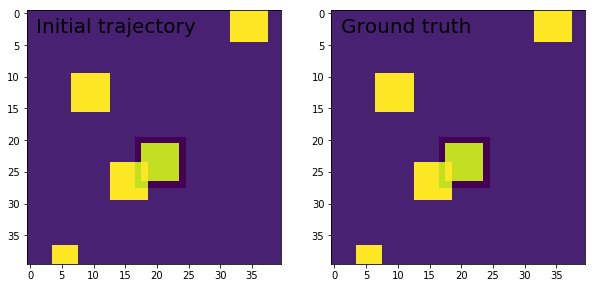

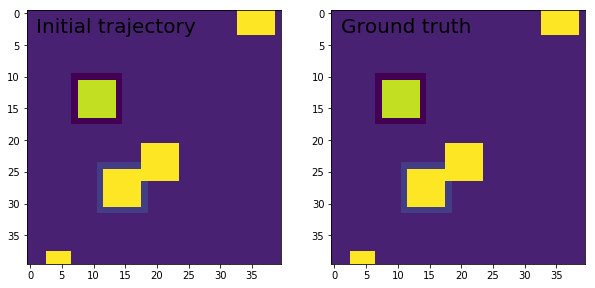

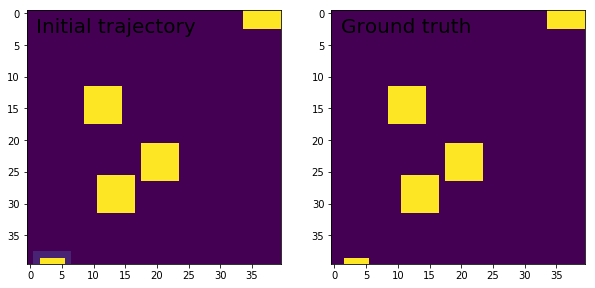

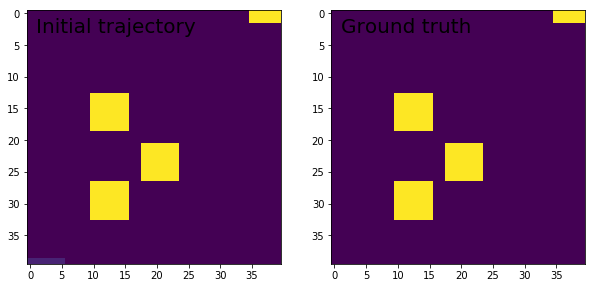

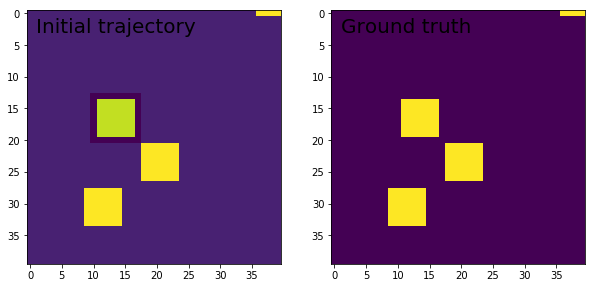

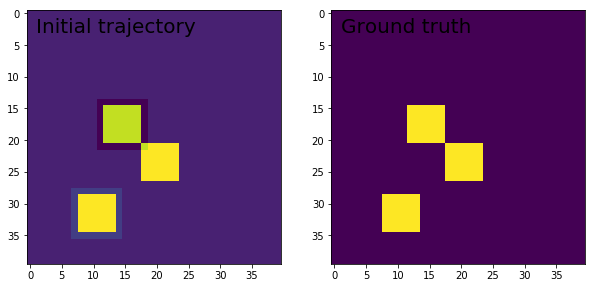

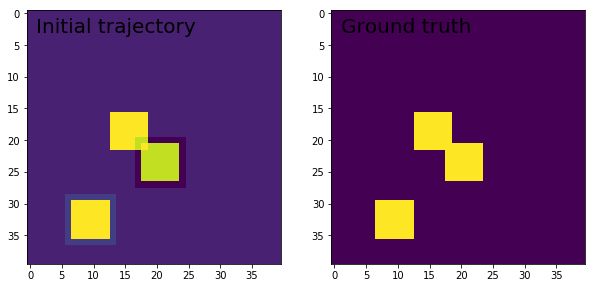

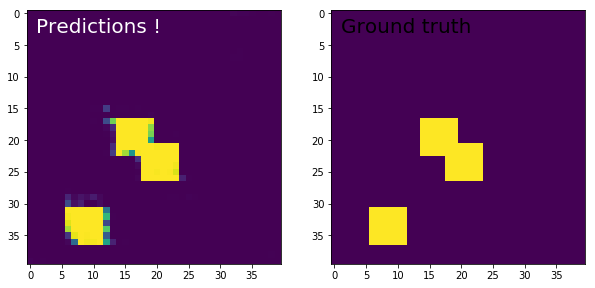

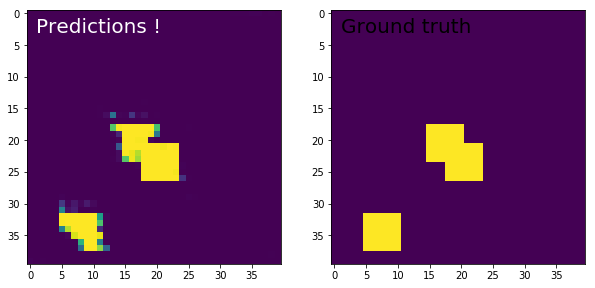

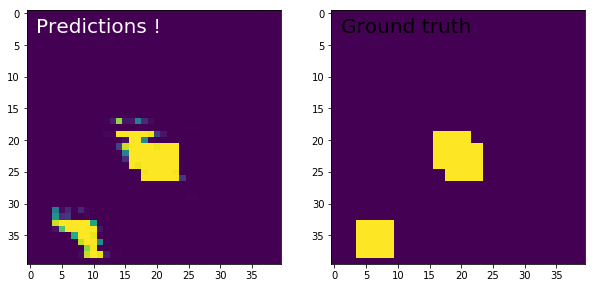

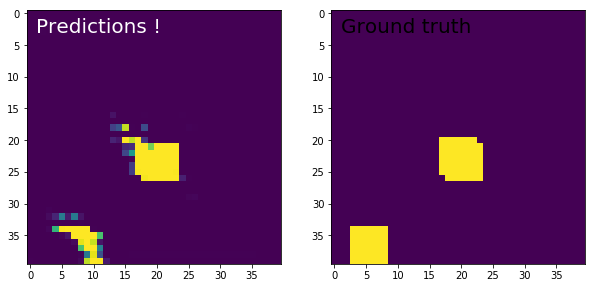

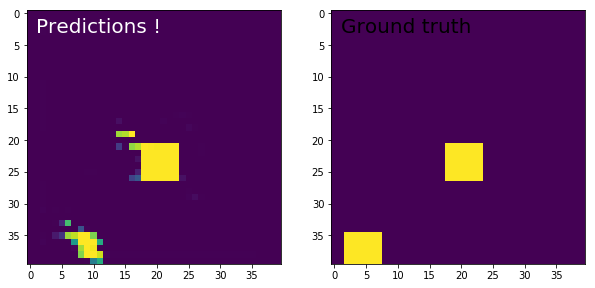

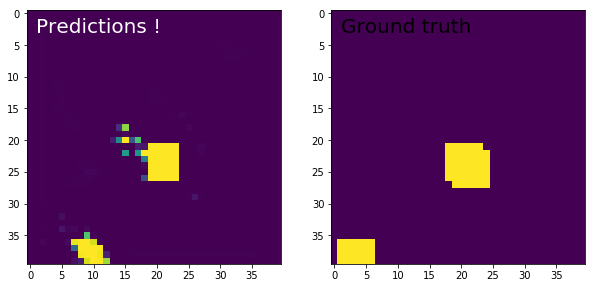

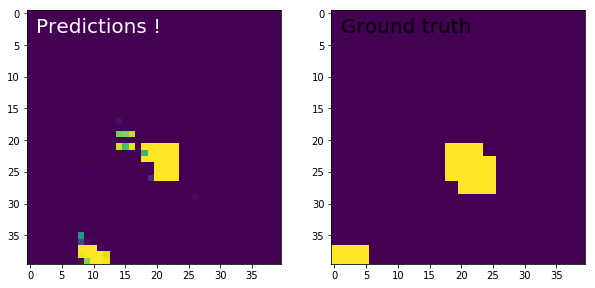

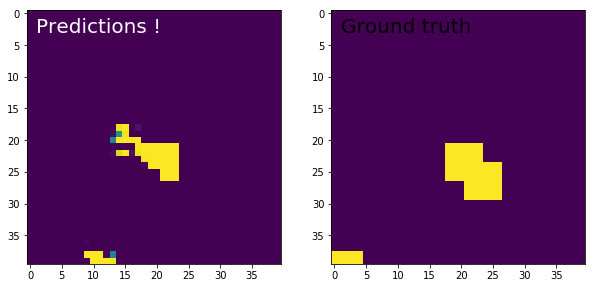

In [0]:
#ConvLSTM2D
#https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py

"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=300, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))
K.clear_session()

## 【問題2】比較結果の説明
11の項目それぞれがどういうものなのかを説明してください。また、比較した結果を表やグラフで載せ、説明してください。今回は「RNNはそれほど詳しくないがタスクで必要になったためKerasのドキュメントを見た」という仮定を置きます。

条件が違うので単純比較はできないが、以下のようにまとめられる。<br>

|Layer|Test Score |Test Accuracy|Speed|Condition|Description|
|---|---|---|---|---|---|
|RNN|0.571|0.786|1ms/step|node数32のSimpleRNNCellを1層で実行|Recurrentレイヤーの基底クラス<br>cellレイヤーを受け取る|
|SimpleRNN|0.701|0.774|1ms/step|node数32で実行|出力が入力にfeedbackされる全結合RNN|
|GRU|0.473|0.820|3ms/step|node数32で実行|gate付きRNN<br>LSTMの出力ゲートを欠いたもの|
|LSTM|0.472|0.821|4ms/step|node数32で実行|LSTM|
|SimpleRNNCell|0.855|0.793|2ms/step|32, 64のセルの2層で実行|SimpleRNNのCellクラス<br>RNNにcellとして渡す|
|GRUCell|0.618|0.814|6ms/step|32, 64のセルの2層で実行|GRUのCellクラス<br>RNNにcellとして渡す|
|LSTMCell|0.652|0.811|8ms/step|32, 64のセルの2層で実行|LSTMのCellクラス<br>RNNにcellとして渡す|
|StackedRNNCells|0.610|0.809|ms/step|32, 64のLSTMセルの2層で実行|GRUのCellクラス<br>RNNにcellとして渡す|
|CuDNNGRU|0.787|0.814|0.3ms/step|64を1層で実行|GPU上でのみ機能|
|CuDNNLSTM|0.551|0.819|0.3ms/step|64を1層で実行|GPU上でのみ機能|
|ConvLSTM2D|-|-|-|kerasのexampleを実行|畳み込みLST|












## 【問題3】（アドバンス課題）複数のデータセット間での比較
単一のデータセットでの実験に留めず、他のデータセットでも実験してみます。

[データセット - Keras Documentation](https://keras.io/ja/datasets/#_5)

Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。IMDBは2値分類であったが、こちらは46値分類の問題です。